# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model to identify if a patient has heart-disease or not.

We're going to the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical paramaters about a patient, can we predict if the patient has heart disease or not?

## 2. Data

The original data came from the Cleavland data from UCI ML repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting during proof of concept, we will pursue the project.

## 4. Features

**Create data dictionary**

Attribute Information:

Only 14 attributes used:
1. (age)
2. (sex)
3. (cp)
4. (trestbps)
5. (chol)
6. (fbs)
7. (restecg)
8. (thalach)
9. (exang)
10. (oldpeak)
11. (slope)
12. (ca)
13. (thal)
14. (num) (the predicted attribute)

### 4.1 Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation.

In [156]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### 4.2 Load data

In [157]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

### 4.3 Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become subject matter expert on the dataset you are working with.

1. What questions(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Let's find out how many of each class there?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

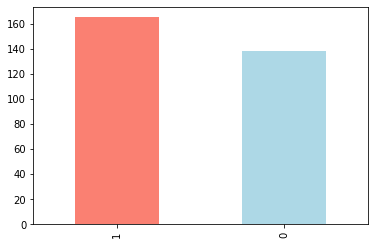

In [9]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [16]:
df.sex.value_counts() # 1 male, 0 female

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


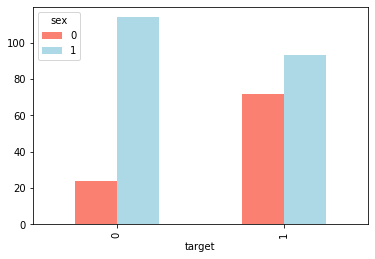

In [18]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);

### Age vs Max Heart Rate for Heart Disease

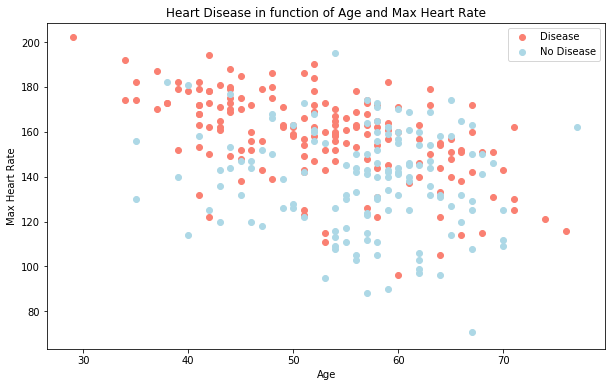

In [25]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue')

# Add some info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

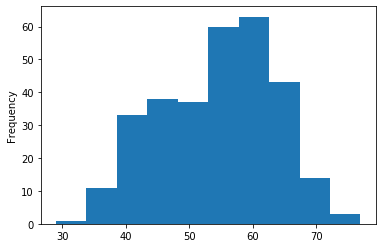

In [26]:
# Check distribution of the age column with a histogram
df.age.plot.hist();

In [27]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


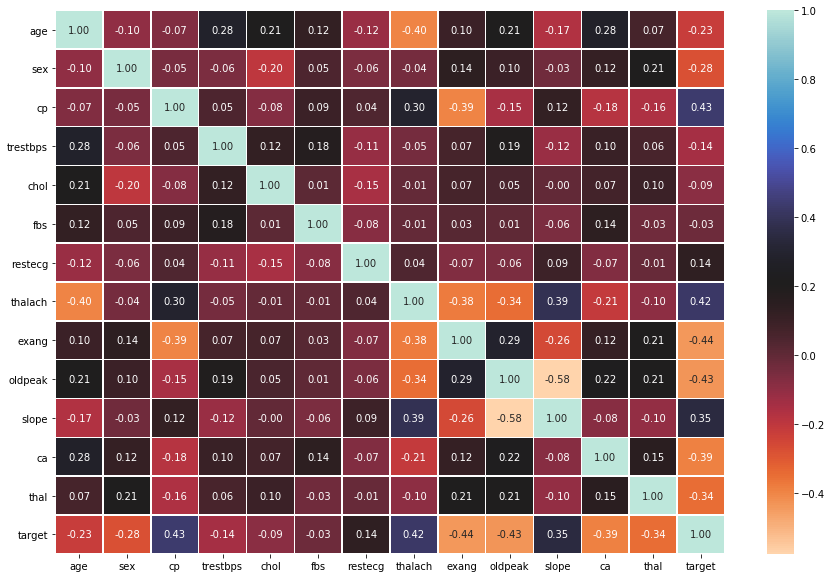

In [131]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="icefire_r");

# 5. Modelling

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
# Split data into X and y
X = df.drop(['target'], axis = 1)
y = df['target']

In [159]:
# Set random seed
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### We are going to try 3 different machine learning models:
    
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest Classifiers

In [58]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : different Scikit-Learn models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        
        #Fit the model to the data
        model.fit(X_train, y_train)
        
        #Evaluate the model and append its score
        model_scores[name] =  model.score(X_test, y_test)
    
    return model_scores

In [59]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

D:\Tutorial Projects\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

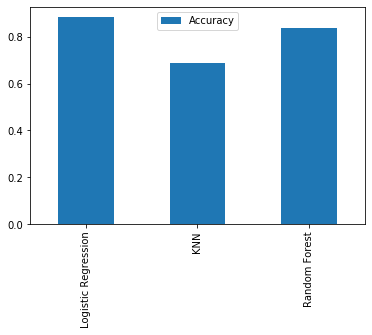

In [69]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

### Now we've got a baseline model. The next step is looking at tuning!

General ML Models
1. Hyperparameter tuning
2. Feature Importance

In tuning we focus on these specific to Classification Model
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1
* Classification Report
* ROC Curve
* AUC

In [70]:
# Let's Tune KNN
train_scores = []
test_scores = []

# Create list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update testing scores list
    test_scores.append(knn.score(X_test, y_test))

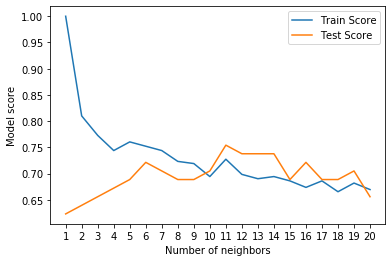

Maximum KNN score on test data: 75.41%


In [77]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
    * Logistic Regression()
    * RandomForestClassifier

In [89]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid ={"n_estimators": np.arange(10,10000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [84]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                              n_iter=20,
                              verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [92]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=1,
                               verbose=2)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=  11.8s
[CV] n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV]  n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=  11.5s
[CV] n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=  11.7s
[CV] n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=  11.7s
[CV] n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None 
[CV]  n_estimators=9760, min_samples_split=14, min_samples_leaf=17, max_depth=None, total=  11.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [95]:
rs_rf.best_params_

{'n_estimators': 9760,
 'min_samples_split': 14,
 'min_samples_leaf': 17,
 'max_depth': None}

In [96]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning with GridsearchCV

We are going to tune Logistic Regression because it provides the highest accuracy!


In [118]:
# Different hyperparameters for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver": ["liblinear"]}

# Setup random hyperparameter search for LogisticRegression
gs_log_reg =GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=2)

# Fit random hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] 

[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [119]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [142]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluate the model beyond accuracy

In [122]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

#### ROC Curve

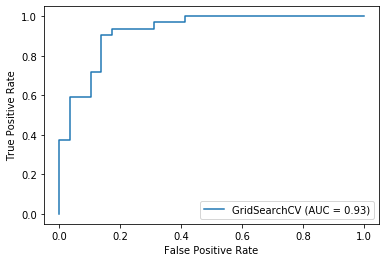

In [126]:
# Plot ROC Curver and calculates AUC
plot_roc_curve(gs_log_reg, X_test, y_test)


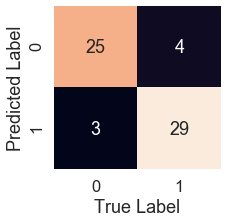

In [140]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot  confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

#### Classification report

In [143]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross-validation

In [144]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [162]:
# Create a new classififer with best parameters
model = LogisticRegression(C=0.20433597178569418,
                           solver="liblinear")

In [179]:
# Cross-validated accuracy
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [180]:
# Cross-validated precision
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)

In [181]:
# Cross-validated f1
cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)

In [182]:
# Cross-validated recall
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)

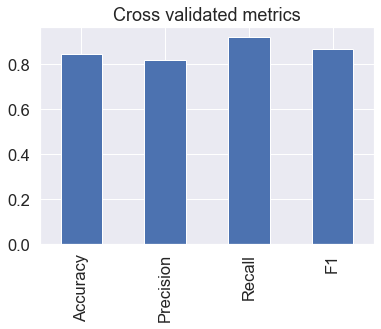

In [184]:
# Visualise cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross validated metrics",
                     legend=False)

### Feature Importance

The another way determining which features contributed to the most outcomes of the model.

In [186]:
# Create a new classififer with best parameters
model = LogisticRegression(C=0.20433597178569418,
                           solver="liblinear")

model.fit(X_train, y_train);

In [188]:
# Check coef
model.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [190]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

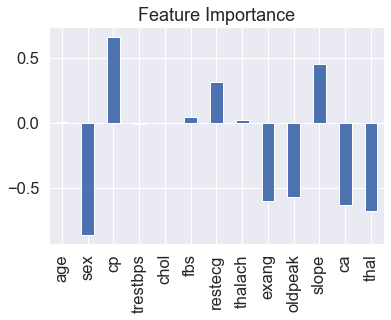

In [192]:
# Visualise feature importance
feature_df =pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);